## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units = 10, num_neurons=[1024,256, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2, 1e-3]
EPOCHS = 500
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.8]
NESTEROV = [True, False]

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for mt in MOMENTUM:
        for ns in NESTEROV:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print("Experiment with LR = %.6f" % (lr))
            model = build_mlp(input_shape=x_train.shape[1:])
            model.summary()
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=ns, momentum=mt)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(x_test, y_test), 
                      shuffle=True)

            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]

            exp_name_tag = "exp-lr=%s, nesterov=%s, momentum=%s" % (str(lr),str(ns),str(mt))
            results[exp_name_tag] = {'train-loss': train_loss,
                                     'valid-loss': valid_loss,
                                     'train-acc': train_acc,
                                     'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                16448     
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 3,426,250
Trainable params: 3,426,250
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 225us/step - loss: 2.0293 - accuracy: 0.2758 - val_loss: 1.8574 - val_accuracy: 0.3422
Epoch 2/5
50000/50000 [==============================] - 11s 227us/step - loss: 1.7974 - accuracy: 0.3696 - val_loss: 1.7552 - val_accuracy: 0.3822
Epoch 3/5
50000/50000 [==============================] - 11s 216us/step - loss: 1.7129 - accuracy: 0.4011 - val_loss: 1.6905 - val_accuracy: 0.4041
Epoch 4/5
50000/50000 [==============================] - 11s 224us/step - loss: 1.6491 - accuracy: 0.4223 - val_loss: 1.6378 - val_accuracy: 0.4249
Epoch 5/5
50000/50000 [==============================] - 11s 229us/step - loss: 1.5994 - accuracy: 0.4388 - val_loss: 1.6016 - val_accuracy: 0.4402
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (N

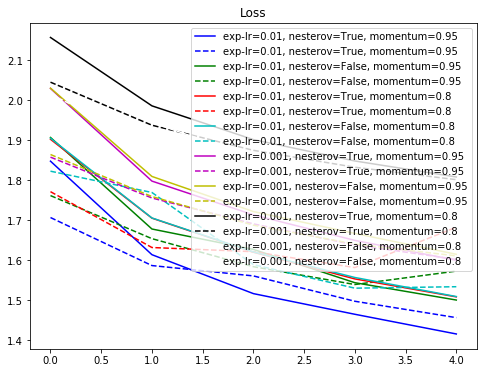

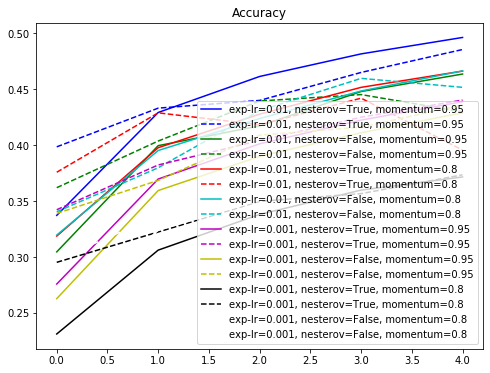

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] #["r", "g", "b", "y", "m", "k", "o", "p"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()